In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [2]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import opendatasets as od
import pandas as pd

2023-10-04 03:19:40.324351: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-04 03:19:40.324394: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-04 03:19:40.324418: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-04 03:19:41.266079: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minve

In [3]:
od.download("https://www.kaggle.com/datasets/gonzajl/tumores-cerebrales-mri-dataset")

Skipping, found downloaded files in "./tumores-cerebrales-mri-dataset" (use force=True to force download)


In [4]:
path = 'tumores-cerebrales-mri-dataset/tumores-cerebrales-mri-dataset'

In [5]:
datos = pd.read_csv('tumores-cerebrales-mri-dataset/datos.csv')

In [6]:
cant_max = 3

glioma_df = datos[datos['glioma'] == 1].head(cant_max)
meningioma_df = datos[datos['meningioma'] == 1].head(cant_max)
pituitary_df = datos[datos['pituitary'] == 1].head(cant_max)
no_tumor_df = datos[datos['no_tumor'] == 1].head(cant_max)

datos = pd.concat([glioma_df, meningioma_df, pituitary_df, no_tumor_df], ignore_index=True)

In [7]:
def cargar_imagenes(nombres, et):
    imagenes = []
    etiquetas = []
    for i in range(len(nombres)):
        ruta = 'tumores-cerebrales-mri-dataset/' + nombres[i][2:]
        imagen = cv2.imread(ruta, cv2.IMREAD_COLOR)
        imagenes.append(imagen)
        etiquetas.append(list(et.iloc[i]))
    return imagenes, etiquetas

In [8]:
paths = datos.iloc[:, 0]
tags = datos.iloc[:, 1:]

imagenes, etiquetas = cargar_imagenes(paths, tags)

imgs_sin_umbral = [np.copy(imagen) for imagen in imagenes]
imgs_con_umbral = [np.copy(imagen) for imagen in imagenes]

In [9]:
for img in imgs_sin_umbral:
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image = np.array(tf.cast(image, tf.uint8))
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 50, param1=3, param2=31, minRadius=3, maxRadius=30)
    
    if circles is not None:    
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(img, (i[0], i[1]), i[2], (0,255,0), 2)  # dibujar circulo 
            cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 3)     # dibujar centro

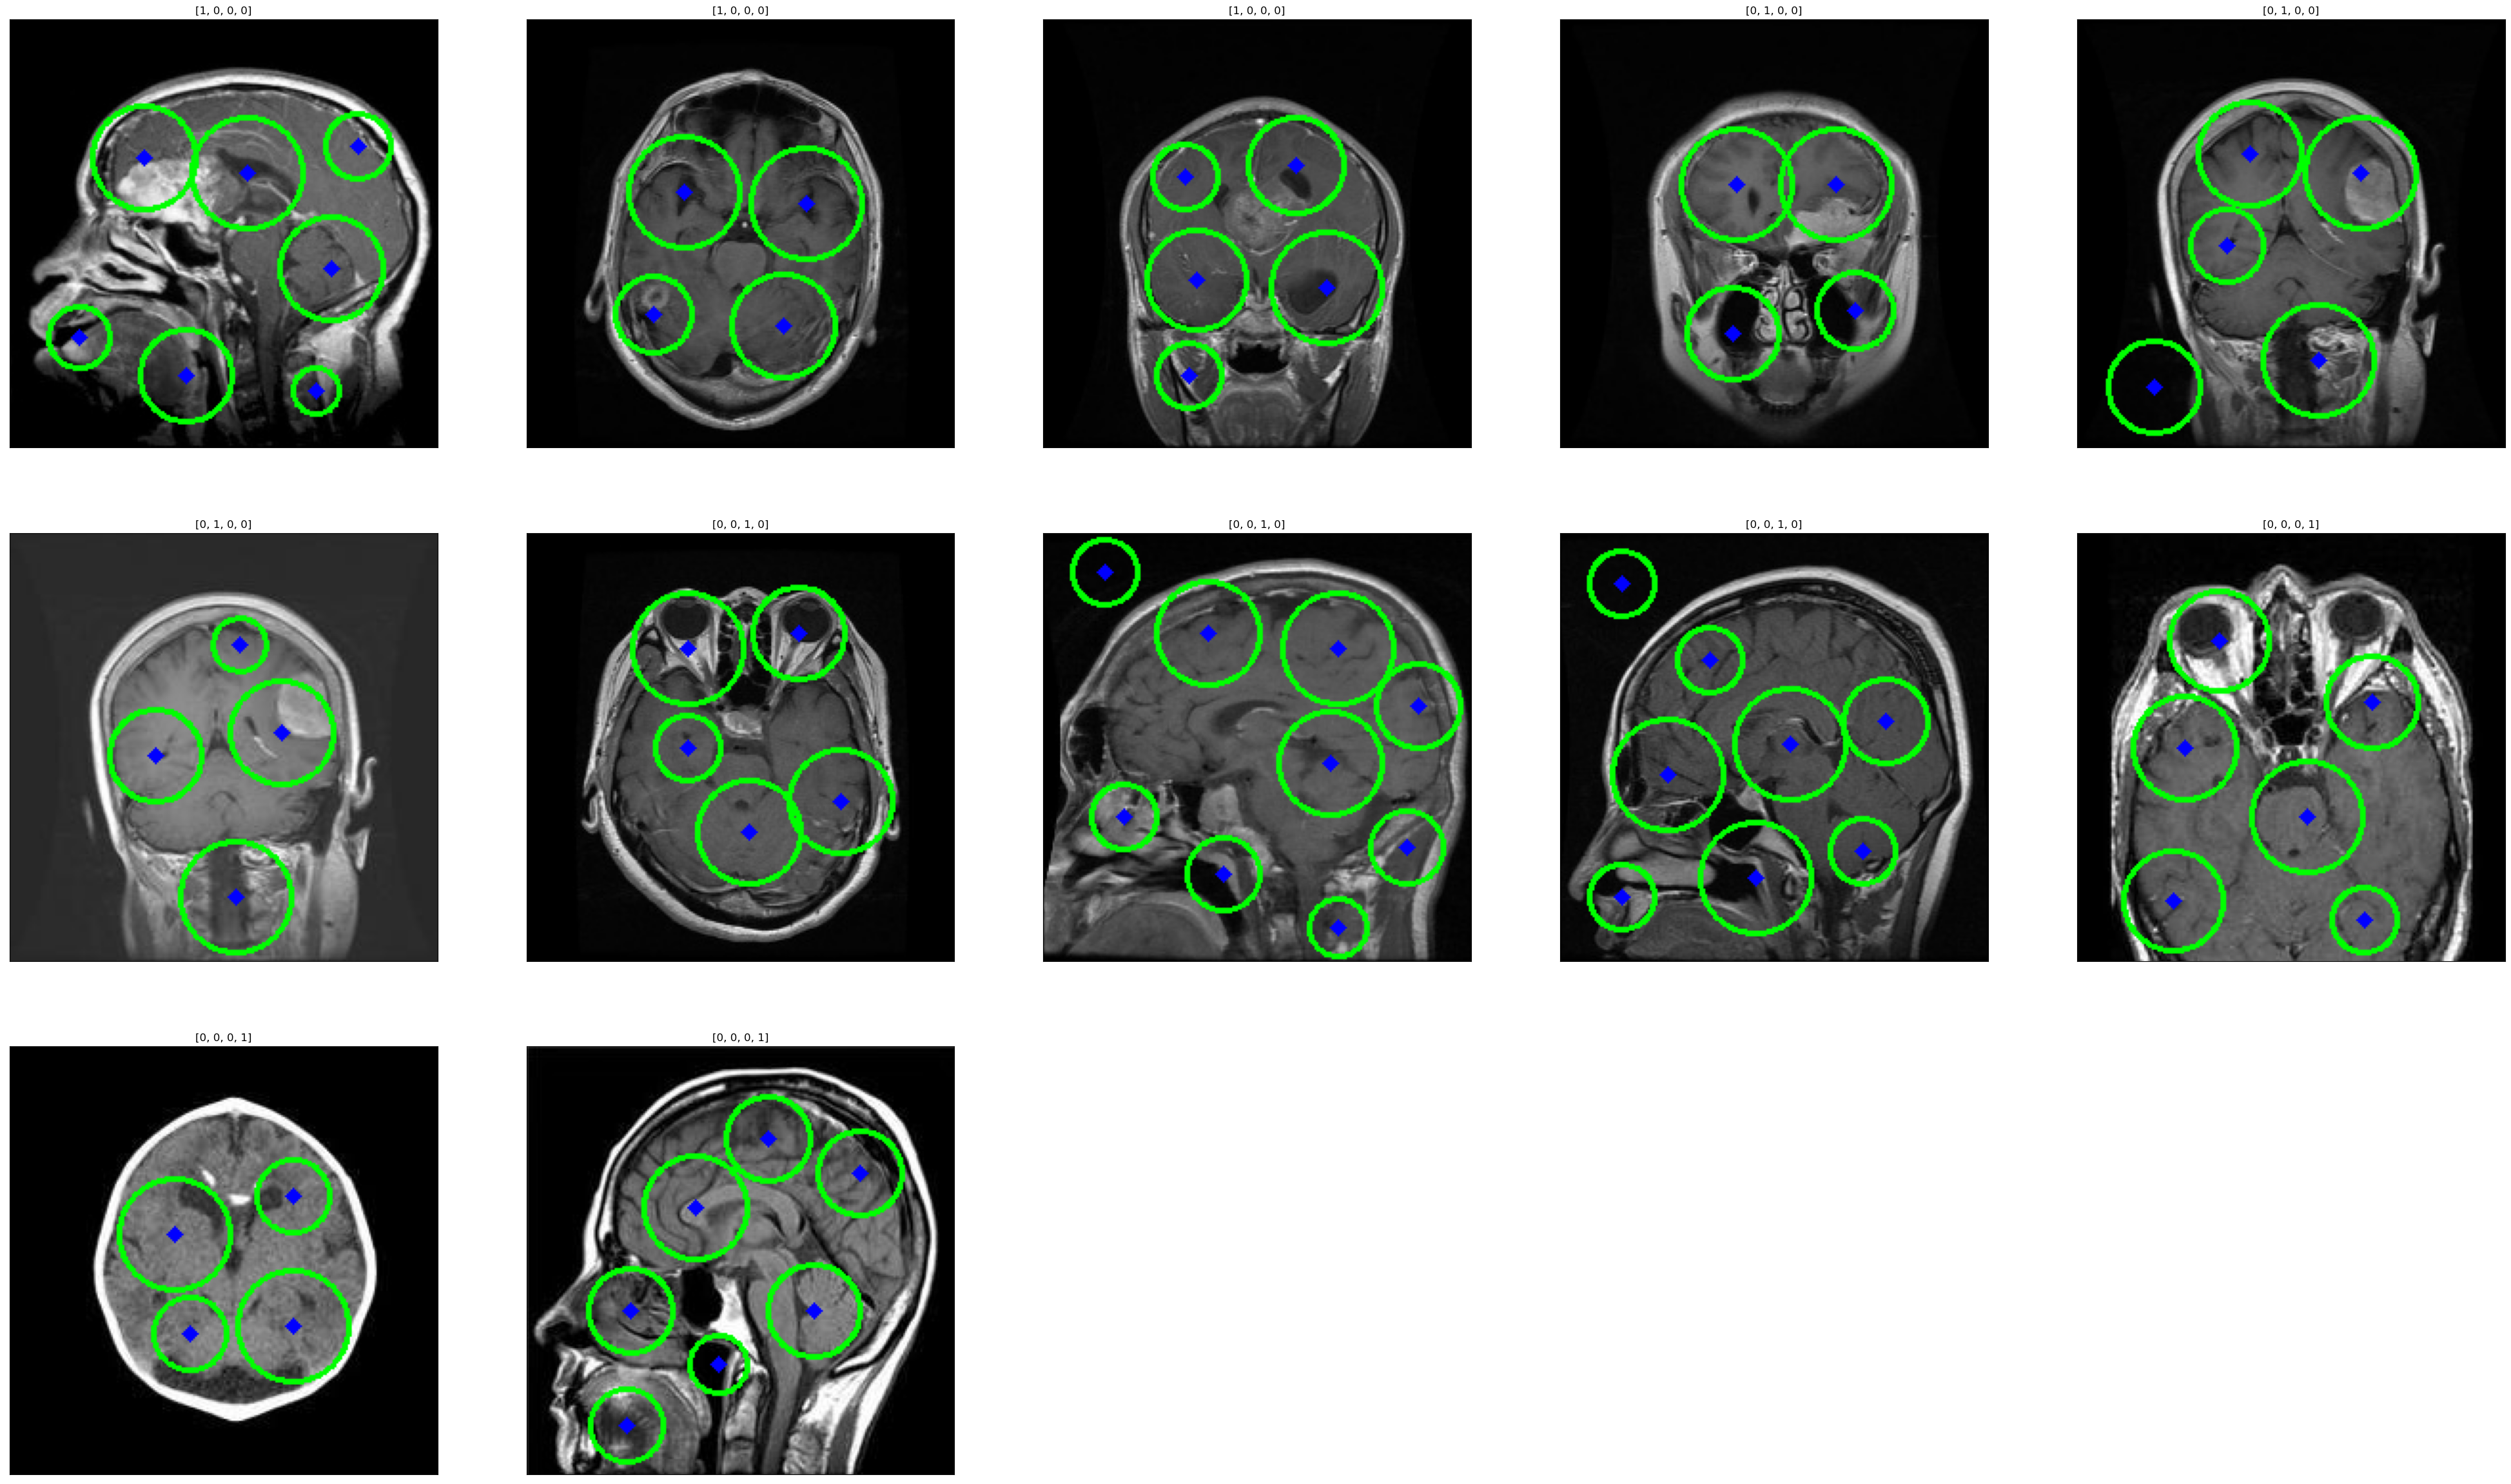

In [10]:
plt.figure(figsize = (50, 50))

for i in range(len(imgs_sin_umbral)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imgs_sin_umbral[i])
    plt.title(etiquetas[i])

plt.show()

In [11]:
def umbral(img):
    valor_umbral = 90
    con_umbral = np.array(tf.where(img > valor_umbral, 255, 0))
    return con_umbral

In [12]:
for img in imgs_con_umbral:
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image = umbral(image)
    image = np.array(tf.cast(image, tf.uint8))
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 0.2, 1, param1=2, param2=21, minRadius=3, maxRadius=30)
    
    if circles is not None:    
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(img, (i[0], i[1]), i[2], (0,255,0), 2)  # dibujar circulo 
            cv2.circle(img, (i[0], i[1]), 2, (0,0,255), 3)     # dibujar centro 

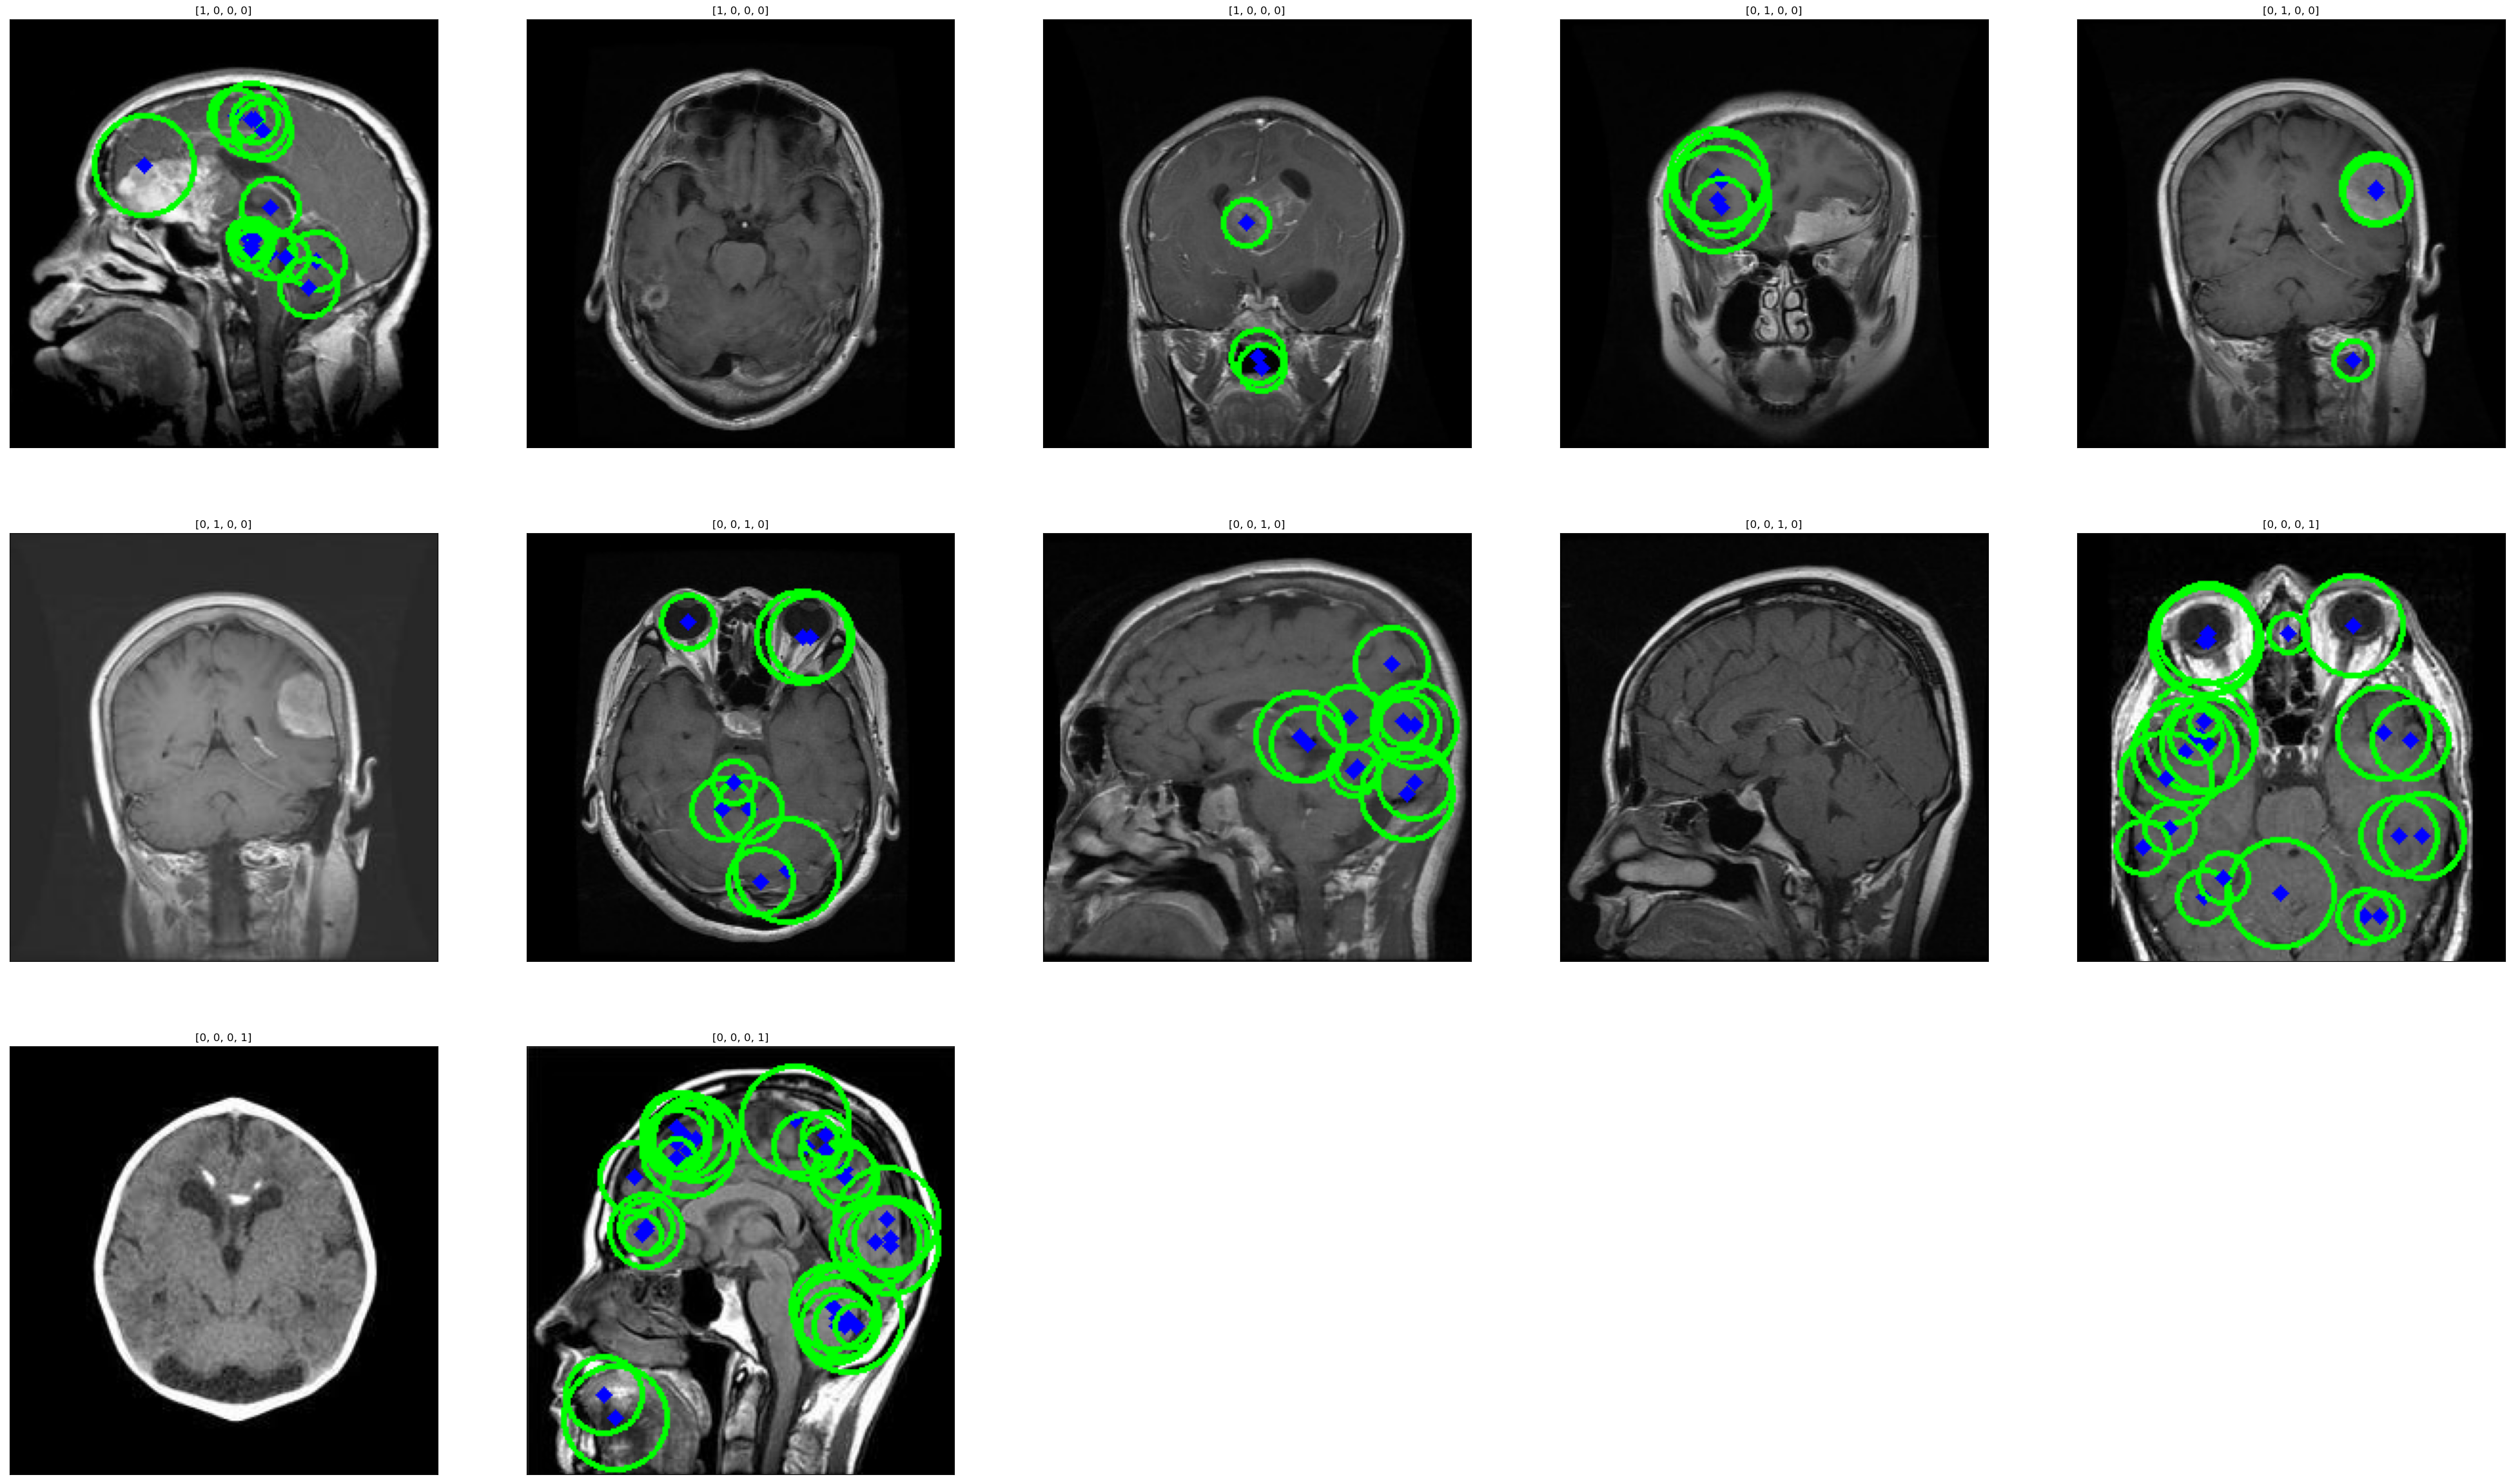

In [14]:
plt.figure(figsize = (50, 50))

for i in range(len(imgs_con_umbral)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imgs_con_umbral[i])
    plt.title(etiquetas[i])

plt.show()